# Genetic Algorithm evolving Neural Net

This notebook presents the performance of genetic algorithm that aims in evolving neural net's weights.

This neural net is trained to recognize the pictures containing plus symbol.

## Dataset

Firstly, we need to prepare dataset. It consists of 2000 pictures, half of which are target cases, and second half is noise.


This is how the training data looks like


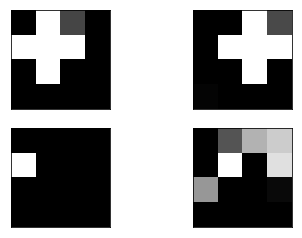

In [2]:
from gannarch import *
from gannarchv2 import *
from gannarchv3 import *
from gannarchv4 import *
from gann import *


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

%matplotlib inline

rin = np.random.randint
ran = np.random.random

n_cases = 1000
height = 4
width = 4
placeholders_target = np.zeros((n_cases,height,width))
placeholders_noise = np.zeros((n_cases,height,width))

placeholders_target = np.array([create_instance(placeholders_target[n],1) 
                                     for n in range(n_cases)])
placeholders_noise = np.array([create_random_inst(placeholders_noise[n]) 
                                     for n in range(n_cases)])

target = [[1,0] for n in range(n_cases)]
noise = [[0,1] for n in range(n_cases)]

dataset = np.vstack([placeholders_target,placeholders_noise])

print('This is how the training data looks like')

for row,n in zip(range(1,5),range(n_cases-2,n_cases+2)):
    
    plt.subplot(2,2,row)
    plt.imshow(dataset[n],cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.show()

# Turining into feture-like array

target = np.vstack([target,noise])
dataset = dataset.reshape((n_cases*2,height*width)) 



## Setting parameters

I am checking which initial number of population provides best results.

In [2]:
results = dict()
for n in range(1,10):
    n = n * 100
    ga = GenAlWeightsNN(n_pop=n,max_gen=50)
    ga.fit(dataset,target)
    ga.transform()
    results[str(n)] = (ga.best_ind,ga.validate())
    
result_dict = pd.DataFrame(index = results.keys())
result_dict['Accuracy on test'] = [round(n[0]*100,2) for n in results.values()]
result_dict['Accuracy validate'] = [round(n[1],2) for n in results.values()]
result_dict

,Accuracy on test,Accuracy validate
100,79.68,79.10
200,80.24,80.19
300,80.11,78.87
400,80.39,80.55
500,80.76,79.73
600,80.57,80.31
700,81.09,82.72
800,80.86,81.60
900,80.25,79.73


# The performance of algorithm

After testing some paramters I have found the fine parameters that allows for achieving best results. In purpose of maximazing the search space I used 1000 initial population.

In [4]:
N_POP = 1000
MAX_GEN = 200
DES_FIT = 0.95

# First implementation

The first version of algorithm was changing only the weights of neurons in neural net.

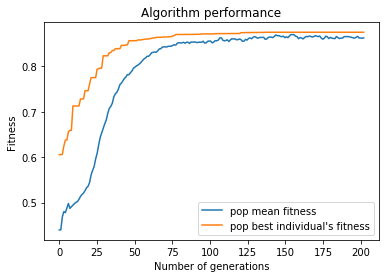

Achieved accuracy:87.53
Achieved accuracy on validate dataset:87.36


In [5]:
ga = GenAlWeightsNN(n_pop=N_POP,max_gen=MAX_GEN,desired_fit=DES_FIT)
ga.fit(dataset,target)
ga.transform()
ga.plot_fitness()
print('Achieved accuracy:{}'.format(round(ga.best_ind*100,2)))
print('Achieved accuracy on validate dataset:{}'.format(
    round(ga.validate(),2)))


# Second implementation - algorithm evolving architecture

Second version of algorithm was changing not only the weights, but also an architecture of neural net, cutting near-0 weights, and adding new ones to the layers, with probability 0.01

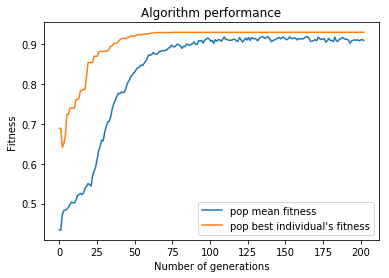

Achieved accuracy:92.94
Achieved accuracy on validate dataset:92.27


In [32]:
ga = GenAlArchNN(n_pop=N_POP,max_gen=MAX_GEN,desired_fit=DES_FIT)
ga.fit(dataset,target)
ga.transform()
ga.plot_fitness()
print('Achieved accuracy:{}'.format(round(ga.best_ind*100,2)))
print('Achieved accuracy on validate dataset:{}'.format(
    round(ga.validate(),2)))


# Developing second implementation - version 2

THis is same algorithm as previous, but this time the mechanism of random number of neurons in layer was implemented.

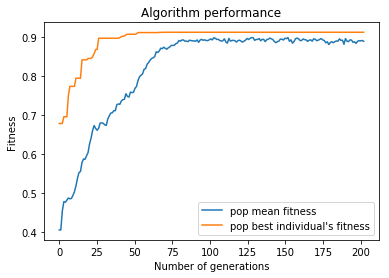

Achieved accuracy:91.34
Achieved accuracy on validate dataset:90.27


In [33]:
ga = GenAlArchNNv2(n_pop=N_POP,max_gen=MAX_GEN,desired_fit=DES_FIT)
ga.fit(dataset,target)
ga.max_gen = 200
ga.transform()
ga.plot_fitness()
print('Achieved accuracy:{}'.format(round(ga.best_ind*100,2)))
print('Achieved accuracy on validate dataset:{}'.format(
    round(ga.validate(),2)))


# Developing second implementation - version 3

Third version did not used random initiation, but instead it was taking a parameter n_hid, giving possibility of searching for best number of neurons in layer.

In [6]:
results = dict()
for n in range(5,15):
    ga = GenAlArchNNv3(n_pop=100,n_hid=n,max_gen=50)
    ga.fit(dataset,target)
    ga.transform()
    results[str(n)] = (ga.best_ind,ga.validate())
    
result_dict = pd.DataFrame(index = results.keys())
result_dict['Accuracy on test'] = [round(n[0]*100,2) for n in results.values()]
result_dict['Accuracy validate'] = [round(n[1],2) for n in results.values()]
result_dict    

,Accuracy on test,Accuracy validate
5,76.38,77.07
6,77.91,77.79
7,72.59,73.20
8,80.63,79.47
9,68.32,67.27
10,74.02,75.29
11,77.69,78.99
12,66.81,64.91
13,78.65,78.96
14,78.39,77.66


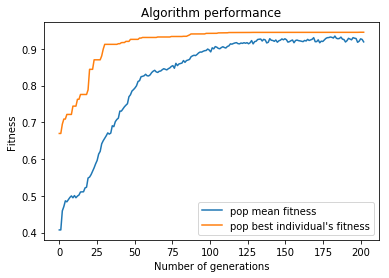

Achieved accuracy:94.51
Achieved accuracy on validate dataset:90.57


In [34]:
ga = GenAlArchNNv3(n_pop=N_POP,max_gen=MAX_GEN,desired_fit=DES_FIT,n_hid = 8)
ga.fit(dataset,target)
ga.max_gen = 200
ga.transform()
ga.plot_fitness()
print('Achieved accuracy:{}'.format(round(ga.best_ind*100,2)))
print('Achieved accuracy on validate dataset:{}'.format(
    round(ga.validate(),2)))


# Last version of algorithm

This is actually the last implementation, that works just like previous version, the only change is that it uses uniform function, not random, when it comes to weights.

In [7]:
results = dict()
for n in range(5,15):
    ga = GenAlArchNNv4(n_pop=100,n_hid=n,max_gen=50)
    ga.fit(dataset,target)
    ga.transform()
    results[str(n)] = (ga.best_ind,ga.validate())
    
result_dict = pd.DataFrame(index = results.keys())
result_dict['Accuracy on test'] = [round(n[0]*100,2) for n in results.values()]
result_dict['Accuracy validate'] = [round(n[1],2) for n in results.values()]
result_dict   

,Accuracy on test,Accuracy validate
5,74.20,72.86
6,71.35,70.55
7,73.75,73.01
8,79.35,78.21
9,69.51,70.47
10,80.51,80.30
11,75.82,74.82
12,80.15,79.70
13,66.91,66.62
14,69.87,69.30


Achieved accuracy:86.51
Achieved accuracy on validate dataset:86.59


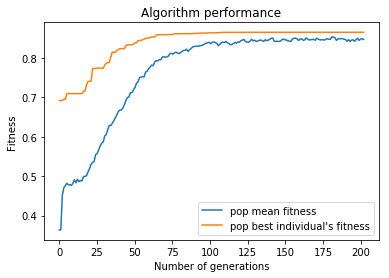

In [11]:
ga = GenAlArchNNv4(n_pop=N_POP,max_gen=200,desired_fit=DES_FIT,n_hid = 10)
ga.fit(dataset,target)
ga.transform()
ga.plot_fitness()

print('Achieved accuracy:{}'.format(round(ga.best_ind*100,2)))
print('Achieved accuracy on validate dataset:{}'.format(
    round(ga.validate(),2)))

## Summary

Achieved accuracy was 94%, which is satysfying result. 


### References

Above implementation used a parts of numpy-based neural net taken from: 

https://www.kaggle.com/niyipop/2-layer-neural-network-from-scratch-using-numpy/data/

Genetic algorithm originates from:

https://github.com/stakar/Sig_Feat_Selector